## Working with groupby
The .groupby() method in Pandas is used to split a dataset into groups, apply an aggregation function, and then combine the results. It is useful for summarizing, aggregating, and analyzing data.
- df.groupby("column_name").aggregation_function()

In [21]:
# Read Final_Olympic and show 5 top rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Final_Olympic = pd.read_csv("Final_Olympic.csv")
print(Final_Olympic.head())

     Year    City      Sport     Discipline        Athlete Name  NOC Gender  \
0  1896.0  Athens    Cycling  Cycling Track       FLAMENG, Léon  FRA    Men   
1  1896.0  Athens    Cycling  Cycling Track  KOLETTIS, Georgios  GRE    Men   
2  1896.0  Athens  Athletics      Athletics       LANE, Francis  USA    Men   
3  1896.0  Athens  Athletics      Athletics    SZOKOLYI, Alajos  HUN    Men   
4  1896.0  Athens  Athletics      Athletics       BURKE, Thomas  USA    Men   

   Event Event Gender   Medal Position  
0  100km            M    Gold        1  
1  100km            M  Silver        2  
2   100m            M  Bronze        3  
3   100m            M  Bronze        3  
4   100m            M    Gold        1  


In [4]:
# How many medal each country won
medal_counts = Final_Olympic["NOC"].value_counts()
print(medal_counts)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
       ... 
ZZZ       1
SUD       1
MRI       1
TOG       1
AFG       1
Name: count, Length: 139, dtype: int64


In [6]:
# How many medal each country won each year
medals_per_year = Final_Olympic.groupby(["NOC", "Year"])["Medal"].count().reset_index()
print(medals_per_year)

      NOC    Year  Medal
0     AFG  2008.0      1
1     AHO  1988.0      1
2     ALG  1984.0      2
3     ALG  1992.0      2
4     ALG  1996.0      3
...   ...     ...    ...
1068  ZIM  2008.0      4
1069  ZZX  1896.0      6
1070  ZZX  1900.0     34
1071  ZZX  1904.0      8
1072  ZZZ  2008.0      1

[1073 rows x 3 columns]


In [8]:
# Total number of records for each NOC  in each Olympic Year
records_per_year = Final_Olympic.groupby(["NOC", "Year"]).size().reset_index()
print(records_per_year)


      NOC    Year   0
0     AFG  2008.0   1
1     AHO  1988.0   1
2     ALG  1984.0   2
3     ALG  1992.0   2
4     ALG  1996.0   3
...   ...     ...  ..
1068  ZIM  2008.0   4
1069  ZZX  1896.0   6
1070  ZZX  1900.0  34
1071  ZZX  1904.0   8
1072  ZZZ  2008.0   1

[1073 rows x 3 columns]


In [9]:
# When / which year the country receive the first olympic medal
first_medal_year = Final_Olympic.groupby("NOC")["Year"].min().reset_index()
print(first_medal_year)

     NOC    Year
0    AFG  2008.0
1    AHO  1988.0
2    ALG  1984.0
3    ANZ  1908.0
4    ARG  1924.0
..   ...     ...
134  YUG  1924.0
135  ZAM  1984.0
136  ZIM  1980.0
137  ZZX  1896.0
138  ZZZ  2008.0

[139 rows x 2 columns]


In [10]:
# When / which year the country receive the latest olympic medal
latest_medal_year = Final_Olympic.groupby("NOC")["Year"].max().reset_index()
print(latest_medal_year)

     NOC    Year
0    AFG  2008.0
1    AHO  1988.0
2    ALG  2008.0
3    ANZ  1912.0
4    ARG  2008.0
..   ...     ...
134  YUG  2000.0
135  ZAM  1996.0
136  ZIM  2008.0
137  ZZX  1904.0
138  ZZZ  2008.0

[139 rows x 2 columns]


In [12]:
# SPecific country performance "USA"
usa_performance = Final_Olympic[Final_Olympic["NOC"] == "USA"]
usa_medals_per_year = usa_performance.groupby("Year")["Medal"].count().reset_index()
print(usa_medals_per_year)


      Year  Medal
0   1896.0     20
1   1900.0     55
2   1904.0    394
3   1908.0     63
4   1912.0    101
5   1920.0    193
6   1924.0    198
7   1928.0     84
8   1932.0    181
9   1936.0     92
10  1948.0    148
11  1952.0    130
12  1956.0    118
13  1960.0    112
14  1964.0    150
15  1968.0    149
16  1972.0    155
17  1976.0    155
18  1984.0    333
19  1988.0    193
20  1992.0    224
21  1996.0    260
22  2000.0    248
23  2004.0    264
24  2008.0    315


## Challenge

**Using a line graph, plot the number of gold medals won by the USA male and female Olympians throughout the history of the Olympics?
Distinguish between the male and female Olympians in the line graph using blue and pink colors**

In [17]:
# 1. Filter dataframe to get the data of Gold Medal for USA   
usa_gold = Final_Olympic[(Final_Olympic['NOC'] == 'USA') &  (Final_Olympic['Medal'] == 'Gold')]

In [18]:
# 2. Groupby based on year and Gender to get the number of gold medal for each gender in each year 
gold_counts = usa_gold.groupby(['Year', 'Gender']).size().reset_index(name='Count')
male = gold_counts[gold_counts['Gender'] == 'Men']
female = gold_counts[gold_counts['Gender'] == 'Women']
# Display the first few rows to verify
gold_counts.head()

,Year,Gender,Count
0,1896.0,Men,11
1,1900.0,Men,26
2,1900.0,Women,1
3,1904.0,Men,140
4,1904.0,Women,6


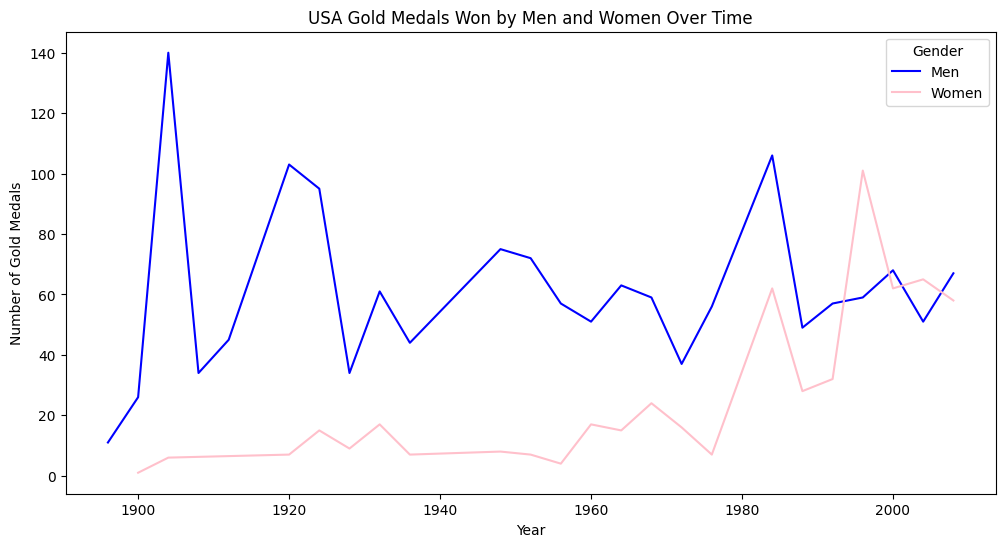

In [22]:
# Plot the trend of number of gold medal for men and women in each year
plt.figure(figsize=(12,6))

sns.lineplot(data=gold_counts,x='Year',y='Count',hue='Gender',palette={'Men': 'blue', 'Women': 'pink'})

plt.title('USA Gold Medals Won by Men and Women Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

plt.show()

Create a bar plot showing the number of gold medals won by the top five Olympians between 1896 and 2008.

In [24]:
# Filter only gold medalists
usa_gold = Final_Olympic[(Final_Olympic['NOC'] == 'USA') & (Final_Olympic['Medal'] == 'Gold')]

In [ ]:
# You can use value_counts() 

In [30]:
# or groupby("Athlete Name")

# Get the top 5 Olympians with the most gold medals
top5_athletes = usa_gold['Athlete Name'].value_counts().head(5).reset_index()
top5_athletes.columns = ['Athlete Name', 'Gold_Medals']

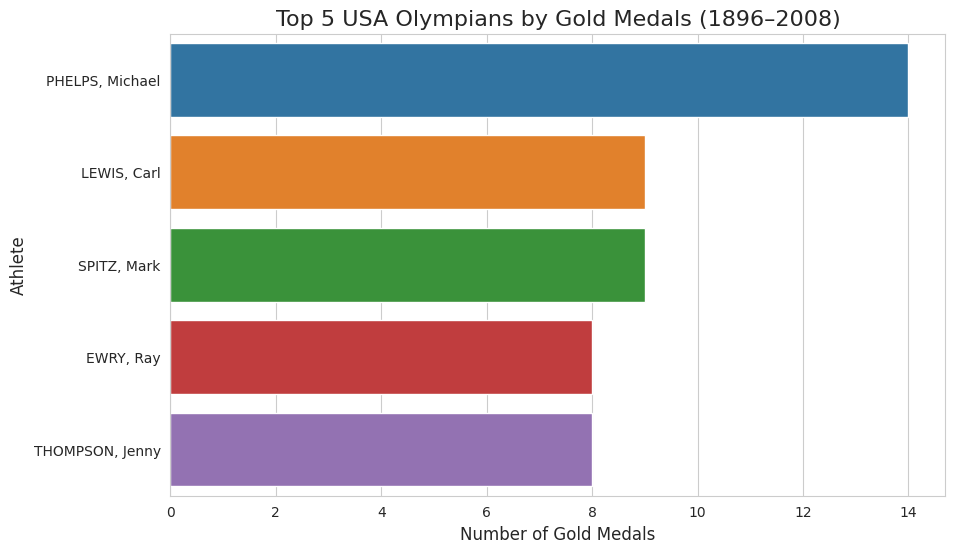

In [32]:
# Plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Gold_Medals', y='Athlete Name', data=top5_athletes, hue='Athlete Name', )
plt.title('Top 5 USA Olympians by Gold Medals (1896–2008)', fontsize=16)
plt.xlabel('Number of Gold Medals', fontsize=12)
plt.ylabel('Athlete', fontsize=12)
plt.show()